      player_name  age  player_height  player_weight  draft_year draft_round  \
0     A.J. Guyton   23           73.0          180.0      2000.0           2   
1    Aaron Brooks   25           72.0          161.0      2007.0           1   
2    Aaron Gordon   22           81.0          220.0      2014.0           1   
3      Aaron Gray   23           84.0          270.0      2007.0           2   
4  Aaron Harrison   23           78.0          210.0         NaN   Undrafted   

  draft_number  gp   pts  reb  ...    POS    BMI      BF  WNGSPN  STNDRCH  \
0           32  33   6.0  1.1  ...  PG-SG  23.24     NaN   75.75     97.5   
1           26  82  19.6  2.6  ...     PG  23.10  0.0270   76.00     94.0   
2            4  58  17.6  7.9  ...     PF  24.48  0.0505   83.75    105.0   
3           49  61   4.3  2.8  ...      C  27.00  0.1080   87.25    108.5   
4    Undrafted   9   6.7  2.7  ...     SG  25.13  0.0600   80.25    100.5   

  STNDVERT LPVERT   LANE  SHUTTLE  SPRINT  
0     33.0  

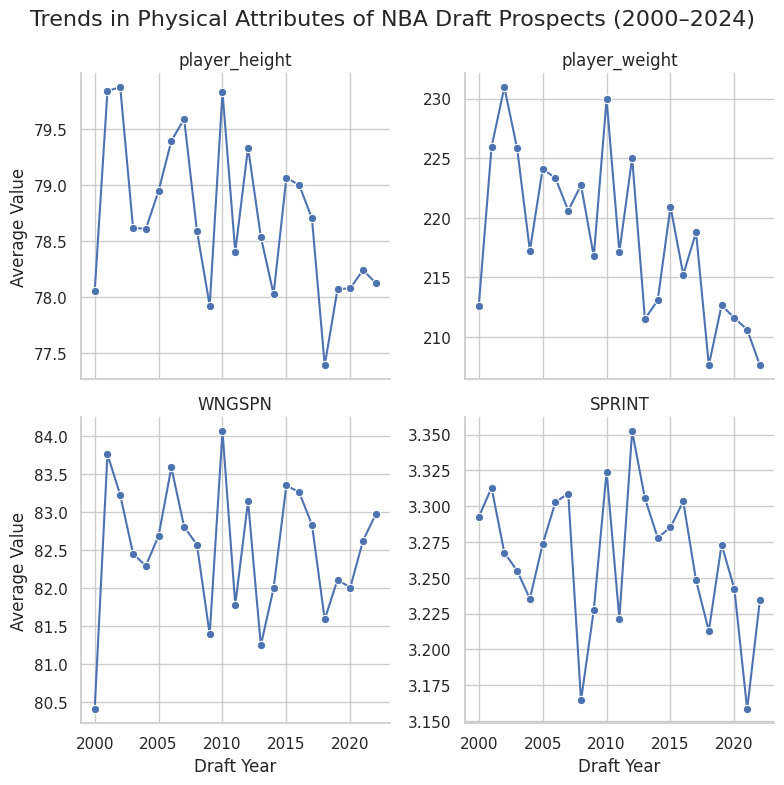

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/RyanHinshaw/csc442_group_project/refs/heads/main/datasets/merged_player_data.csv")

# Display first few rows to confirm structure (optional)
print(df.head())

# Select relevant columns
columns = ['draft_year', 'player_height', 'player_weight', 'WNGSPN', 'SPRINT']
df = df[columns]

# Convert columns to numeric and handle parsing errors
for col in ['player_height', 'player_weight', 'WNGSPN', 'SPRINT']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filter draft years between 2000 and 2024
df = df[df['draft_year'].between(2000, 2024)]

# Group by YEAR and calculate mean of physical attributes
yearly_avg = df.groupby('draft_year')[['player_height', 'player_weight', 'WNGSPN', 'SPRINT']].mean().reset_index()

# Melt the DataFrame for FacetGrid plotting
melted = yearly_avg.melt(id_vars='draft_year', var_name='Attribute', value_name='Average')

# Plotting
sns.set(style="whitegrid", palette="deep", rc={"figure.figsize": (12, 6)})
g = sns.FacetGrid(melted, col='Attribute', col_wrap=2, sharex=True, sharey=False, height=4)
g.map_dataframe(sns.lineplot, x='draft_year', y='Average', marker='o')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Draft Year", "Average Value")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Trends in Physical Attributes of NBA Draft Prospects (2000–2024)", fontsize=16)
plt.show()


R² Score: 0.594
RMSE: 2.051
Model Coefficients: [10.84712172  5.79285877  7.57980516]
Intercept: 55.757464034596715


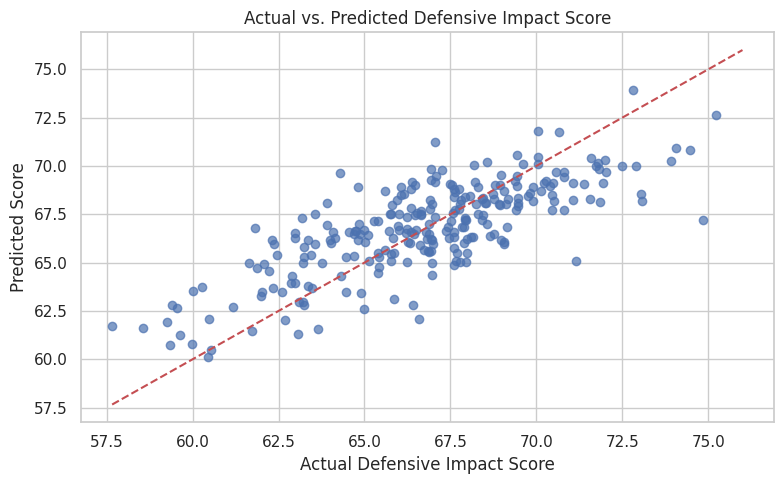

In [ ]:
# Clean column names (remove any extra spaces)
df.columns = df.columns.str.strip()

# Select relevant features
model_df = df[['WNGSPN', 'player_height', 'LPVERT']].copy()

# Drop rows with missing values
model_df.dropna(inplace=True)

# Create a synthetic target (you can replace this with your real target variable)
np.random.seed(42)
model_df['Defensive_Impact_Score'] = (
    0.4 * model_df['WNGSPN'] +
    0.3 * model_df['player_height'] +
    0.3 * model_df['LPVERT'] +
    np.random.normal(0, 2, size=len(model_df))  # Add noise
)

# Normalize feature columns
scaler = MinMaxScaler()
model_df[['WNGSPN_norm', 'player_height_norm', 'LPVERT_norm']] = scaler.fit_transform(
    model_df[['WNGSPN', 'player_height', 'LPVERT']]
)

# Define features and target
X = model_df[['WNGSPN_norm', 'player_height_norm', 'LPVERT_norm']]
y = model_df['Defensive_Impact_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Visualize actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Defensive Impact Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs. Predicted Defensive Impact Score")
plt.grid(True)
plt.tight_layout()
plt.show()
